In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
data=pd.read_csv(r"C:\project\bike_prediction\notebooks\data\day.csv")

In [367]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [368]:
"""ArithmeticErrorinstant: record index
dteday : date
season : season (1:springer, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered"""

'ArithmeticErrorinstant: record index\ndteday : date\nseason : season (1:springer, 2:summer, 3:fall, 4:winter)\nyr : year (0: 2011, 1:2012)\nmnth : month ( 1 to 12)\nhr : hour (0 to 23)\nholiday : weather day is holiday or not (extracted from [Web Link])\nweekday : day of the week\nworkingday : if day is neither weekend nor holiday is 1, otherwise is 0.\nweathersit :\n1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\ntemp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)\natemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)\nhum: Normalized humidity. The values are divided to 100 (max)\nwindspeed

In [369]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [370]:
data.duplicated().sum()

0

In [371]:
data.shape

(731, 16)

In [372]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [374]:
data=data.drop(labels=['casual','registered',"instant","dteday"],axis=1)

In [375]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [376]:
X=data.drop(labels=['cnt'],axis=1)

In [377]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [378]:
y=data['cnt']

In [379]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [380]:
cat_cols=[cols for cols in data.columns if data[cols].dtypes=='O']
num_cols=[cols for cols in data.columns if data[cols].dtypes!='O']

In [381]:
cat_cols

[]

In [382]:
num_cols

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [383]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [384]:
print(f" categories under season variable are : ", end=" ")
print(data['season'].unique())

print(f" categories under season variable are : ", end=" ")
print(data['weathersit'].unique())

 categories under season variable are :  [1 2 3 4]
 categories under season variable are :  [2 1 3]


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [386]:
data['cnt'].describe().T

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

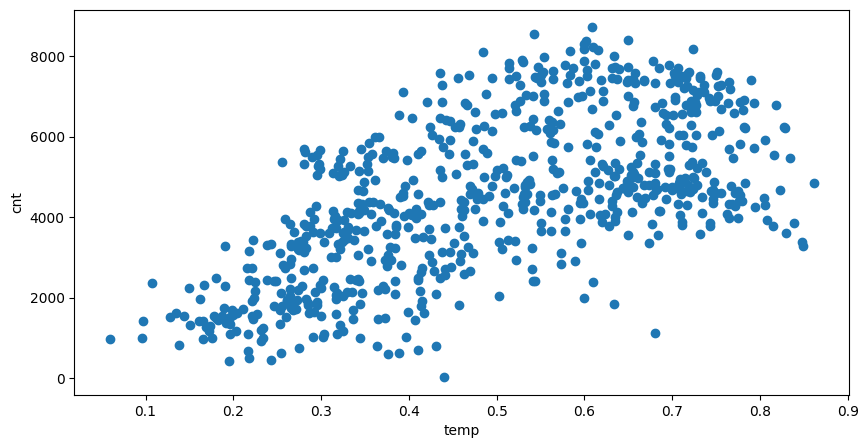

In [387]:
plt.figure(figsize=(10,5))
plt.scatter(data['temp'],data['cnt'])
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

# as we can see that the no of renatl bikes increases as the temperature increses(getting warmer) #

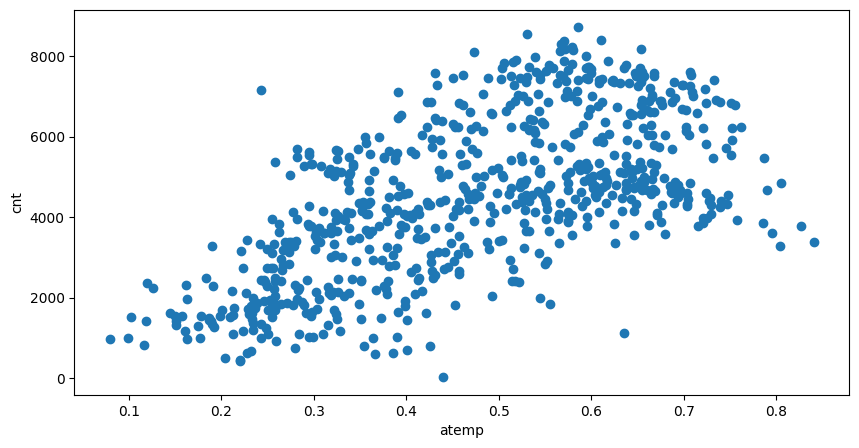

In [388]:
plt.figure(figsize=(10,5))
plt.scatter(data['atemp'],data['cnt'])
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

In [389]:
cat_cols=[cols for cols in X.columns if data[cols].dtypes=='O']
num_cols=[cols for cols in X.columns if data[cols].dtypes!='O']

In [390]:
num_cols

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [391]:
cat_cols

[]

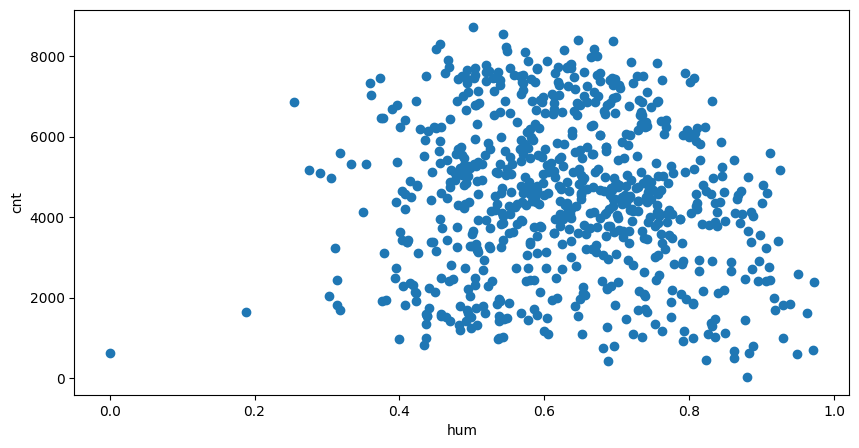

In [392]:
plt.figure(figsize=(10,5))
plt.scatter(data['hum'],data['cnt'])
plt.xlabel('hum')
plt.ylabel('cnt')
plt.show()

# as we can see that there is big cluster of datapoints as the humidity increases upto certin points#

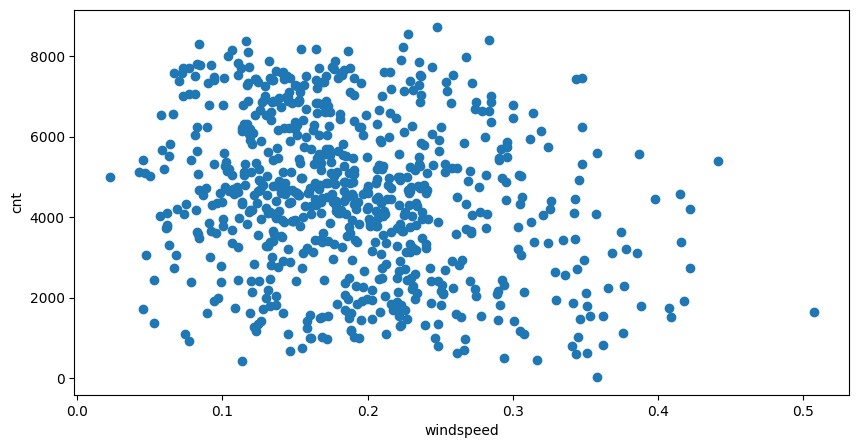

In [393]:
plt.figure(figsize=(10,5))
plt.scatter(data['windspeed'],data['cnt'])
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()

# here we can see the inverse effect where the cnt decreases as windspeed inceases#

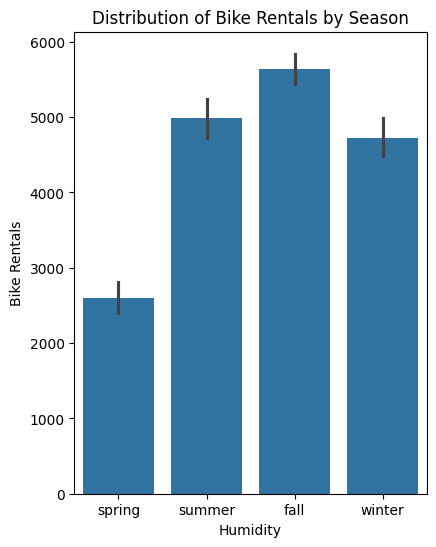

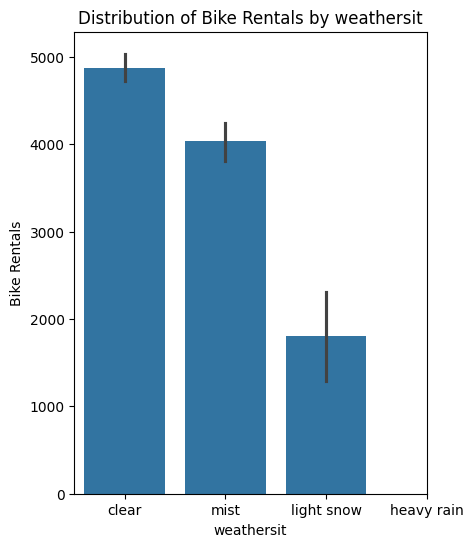

In [394]:

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.barplot(x=data['season'], y=data['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Bike Rentals')
plt.xticks([0,1,2,3],('spring', 'summer', 'fall', 'winter'))
plt.title('Distribution of Bike Rentals by Season')
plt.show()
plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.barplot(x=data['weathersit'], y=data['cnt'])
plt.xlabel('weathersit')
plt.ylabel('Bike Rentals')
plt.xticks([0,1,2,3],('clear','mist','light snow','heavy rain'))
plt.title('Distribution of Bike Rentals by weathersit')
plt.show()



# as we can see that bike rental is more in clear weathersit and in case of season it is more in fall.#

In [395]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [396]:
# numerical pipeline

num_pipeline=Pipeline(

    steps=[
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
           

    ]
)

In [397]:
# categorical pipeline

cat_pipeline=Pipeline(
    
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler()),
        ('encoder',OneHotEncoder())
        
    ]
)


In [398]:
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline, cat_cols)
    ]
)

In [399]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [400]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [401]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [402]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
602,3,1,8,0,6,0,2,0.661667,0.618696,0.712917,0.244408
24,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796
614,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421
144,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233
545,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417
...,...,...,...,...,...,...,...,...,...,...,...
98,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083
39,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839
362,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412
176,3,0,6,0,0,0,1,0.680000,0.637629,0.513333,0.094533


In [403]:
y_train

602    6053
24     1985
614    6203
144    4978
545    5463
       ... 
98     2455
39     1605
362    2423
176    5305
656    7509
Name: cnt, Length: 548, dtype: int64

In [404]:
num_cols

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [405]:
preprocessor.fit_transform(X_train)

array([[ 0.45861678,  0.996357  ,  0.4408588 , ...,  0.93369899,
         0.5897802 ,  0.7183489 ],
       [-1.3175104 , -1.00365632, -1.54871102, ..., -1.43297373,
        -0.08822235, -0.78311154],
       [ 0.45861678,  0.996357  ,  0.72508306, ...,  1.15937596,
         1.27866358, -0.61771927],
       ...,
       [-1.3175104 , -1.00365632,  1.57775584, ..., -1.25206499,
        -0.39055384, -0.91914585],
       [ 0.45861678, -1.00365632, -0.12758972, ...,  1.05033542,
        -0.82037468, -1.24506621],
       [ 1.34668037,  0.996357  ,  1.00930732, ...,  0.28025041,
         0.6987015 ,  0.62047598]])

In [406]:
preprocessor.transform(X_test)

array([[ 0.45861678,  0.996357  ,  0.72508306, ...,  0.64585043,
         0.27771956, -0.46303002],
       [-1.3175104 ,  0.996357  , -1.26448676, ..., -0.41991311,
         0.30716138, -0.03126779],
       [-0.42944681,  0.996357  , -0.69603824, ..., -0.22159485,
        -1.80364796,  0.39242461],
       ...,
       [-1.3175104 , -1.00365632, -1.54871102, ..., -1.46535323,
        -1.36000706, -0.03502759],
       [ 1.34668037, -1.00365632,  1.29353158, ...,  0.35409612,
        -0.29929622,  1.53303516],
       [-1.3175104 , -1.00365632,  1.57775584, ..., -0.24097573,
         1.61721267,  0.41693542]])

In [407]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
602,3,1,8,0,6,0,2,0.661667,0.618696,0.712917,0.244408
24,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796
614,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421
144,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233
545,3,1,6,0,5,1,1,0.834167,0.786613,0.488750,0.165417
...,...,...,...,...,...,...,...,...,...,...,...
98,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083
39,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839
362,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412
176,3,0,6,0,0,0,1,0.680000,0.637629,0.513333,0.094533


In [408]:
# model training

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [409]:
#function to evaluate model using mae,rmse and R2 score  
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [410]:
## Training  multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Random Forest':RandomForestRegressor(),
    'XGboost':XGBRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]


In [411]:
#printing list of models used.
list(models)

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'Random Forest',
 'XGboost']

In [412]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [413]:

models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Random Forest', 'XGboost'])

In [414]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

    

model training performance LinearRegression()
MSE: 895.0374338945207
MAE: 658.161582218307
R2 SCORE: 0.7822080813903483


model training performance Lasso()
MSE: 891.7439855006741
MAE: 655.6138054689243
R2 SCORE: 0.7838079401813101


model training performance Ridge()
MSE: 886.3954540521866
MAE: 652.9183448630736
R2 SCORE: 0.786393530602784


model training performance ElasticNet()
MSE: 1467.5947609334564
MAE: 1229.1263932772858
R2 SCORE: 0.41443964268045164




model training performance RandomForestRegressor()
MSE: 577.917515305833
MAE: 418.447431693989
R2 SCORE: 0.9091989070870445


model training performance XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
MSE: 572.9713776333857
MAE: 410.49104284067624
R2 SCORE: 0.9107465079418671




In [415]:
r2_list

[0.7822080813903483,
 0.7838079401813101,
 0.786393530602784,
 0.41443964268045164,
 0.9091989070870445,
 0.9107465079418671]

In [416]:
max(r2_list)

0.9107465079418671